### Clasificación y Optimización de Hiperparámetros (Core)
Objetivo: Implementar un pipeline completo de machine learning para un problema de clasificación utilizando técnicas de preprocesamiento, modelado, y optimización de hiperparámetros. Enfocar especialmente en la limpieza de datos y la optimización utilizando GridSearchCV y RandomizedSearchCV.

In [36]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, ConfusionMatrixDisplay, roc_curve, auc, roc_auc_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import randint
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../data/insurance.csv')
# Revisamos las primeras columnas para corroborar que cargo bien el dataset
print(df.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


### Exploracion inicial

In [18]:
# Exploramos los tipos de datos de las columnas
df.info()

# verificación de datos nulos
cant_nulos = df.isnull().sum()
print("Valores nulos:\n", cant_nulos)

# verificación de duplicados y eliminar duplicados en caso de encontrarlos
cant_dupl = df.duplicated().sum()
print("Valores duplicados:\n", cant_dupl)
if cant_dupl>0:
    df = df.drop_duplicates()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
Valores nulos:
 age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
Valores duplicados:
 1


In [17]:
# Exploramos las estadisticas del dataset completo. Usamos .T Para verificar los datos de una forma mas cómoda
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


### Preprocesamiento

In [19]:
# Definición de variables categoricas y numericas
columnas_categoricas = ['sex', 'smoker', 'region']
columnas_numericas = ['age', 'bmi', 'children', 'charges']

# One-Hot Encoding para variables categoricas
df_procesed = pd.get_dummies(df, columns=columnas_categoricas)

# Estandar scaler para las variables numericas
scaler = StandardScaler()
df_procesed[columnas_numericas] = scaler.fit_transform(df_procesed[columnas_numericas])

# Ver el resultado
print(df_procesed)


           age       bmi  children   charges  sex_female  sex_male  smoker_no  \
0    -1.440418 -0.453160 -0.909234  0.297857        True     False      False   
1    -1.511647  0.509422 -0.079442 -0.954381       False      True       True   
2    -0.799350  0.383155  1.580143 -0.729373       False      True       True   
3    -0.443201 -1.305052 -0.909234  0.719104       False      True       True   
4    -0.514431 -0.292456 -0.909234 -0.777499       False      True       True   
...        ...       ...       ...       ...         ...       ...        ...   
1333  0.767704  0.050269  1.580143 -0.221263       False      True       True   
1334 -1.511647  0.206053 -0.909234 -0.914695        True     False       True   
1335 -1.511647  1.014490 -0.909234 -0.962287        True     False       True   
1336 -1.297958 -0.797524 -0.909234 -0.931054        True     False       True   
1337  1.551231 -0.261299 -0.909234  1.310298        True     False      False   

      smoker_yes  region_no

### Modelos de clasificacion

In [24]:
# Preparar los datos para entrenamiento
X = df_procesed.drop(columns=['smoker_no', 'smoker_yes'])  # Eliminamos la columna 'smoker' de las características
y = df_procesed['smoker_yes']  # Variable objetivo, en este caso 'smoker'

# Separar los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ver las primeras filas de las variables de entrenamiento
print(X_train.head())
print(y_train.head())

           age       bmi  children   charges  sex_female  sex_male  \
1114 -1.155499 -1.009063 -0.909234 -0.898990       False      True   
968  -1.297958 -0.806543  0.750351 -0.825987       False      True   
599   0.910164  1.125178  0.750351  1.668027        True     False   
170   1.693691  1.772092 -0.909234  0.010430       False      True   
275   0.554015 -0.666338  0.750351 -0.294344        True     False   

      region_northeast  region_northwest  region_southeast  region_southwest  
1114              True             False             False             False  
968               True             False             False             False  
599              False              True             False             False  
170              False             False              True             False  
275               True             False             False             False  
1114    False
968     False
599     False
170     False
275     False
Name: smoker_yes, dtype: bool


In [25]:
# Entrenamiento de modelos
models = [LogisticRegression(),
        RandomForestClassifier(n_estimators=100, random_state=42),
        KNeighborsClassifier(n_neighbors=5)]

columns = ['LogisticRegression','RandomForestClassifier', 'KNeighborsClassifier']
result1, result2, result3 = [], [], []

In [26]:
# Entrenamiento
for i in range(len(models)):
    # Entrenamiento
    models[i].fit(X_train, y_train)
    
    # Predicciones
    pre = models[i].predict(X_test)
    
    # Cálculo de métricas
    accuracy = accuracy_score(y_test, pre)
    recall = recall_score(y_test, pre, average='weighted')  # Cambia el promedio si lo necesitas
    f1 = f1_score(y_test, pre, average='weighted')
    
    # Almacenar resultados
    result1.append(accuracy)
    result2.append(recall)
    result3.append(f1)
    
    print(models[i])
    print(f'Accuracy: {accuracy:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}')
    
ResultadoFinal = pd.DataFrame({
    'Algorithm': columns,
    'Accuracies': result1,
    'Recall': result2,
    'FScore': result3
})

print(ResultadoFinal)
    

LogisticRegression()
Accuracy: 0.9701, Recall: 0.9701, F1 Score: 0.9701
RandomForestClassifier(random_state=42)
Accuracy: 0.9701, Recall: 0.9701, F1 Score: 0.9705
KNeighborsClassifier()
Accuracy: 0.9440, Recall: 0.9440, F1 Score: 0.9435
                Algorithm  Accuracies    Recall    FScore
0      LogisticRegression    0.970149  0.970149  0.970149
1  RandomForestClassifier    0.970149  0.970149  0.970486
2    KNeighborsClassifier    0.944030  0.944030  0.943513


### Optimizacion de hiperparametros

In [31]:
# Definir los hiperparámetros para GridSearchCV
param_grid = {
    'C': [0.01, 0.1, 1, 10],  # Regularización
    'solver': ['lbfgs', 'liblinear'],  # Métodos de optimización
    'penalty': ['l2', 'l1']  # Penalización
}

# Crear el objeto GridSearchCV
grid_search = GridSearchCV(estimator=models[0], param_grid=param_grid, cv=3, n_jobs=-1, scoring='accuracy', verbose=1)

# Entrenar el modelo con GridSearchCV
grid_search.fit(X_train, y_train)

# Ver el mejor conjunto de hiperparámetros
print("Mejores parámetros encontrados por GridSearchCV:", grid_search.best_params_)

# Mejor modelo entrenado
best_model_grid = grid_search.best_estimator_

# Realizar predicciones con el mejor modelo
y_pred_grid = best_model_grid.predict(X_test)

# Evaluar el modelo optimizado
accuracy_grid = accuracy_score(y_test, y_pred_grid)
recall_grid = recall_score(y_test, y_pred_grid, average='weighted')
f1_grid = f1_score(y_test, y_pred_grid, average='weighted')

# Imprimir resultados
print(f"GridSearchCV - Accuracy: {accuracy_grid:.4f}, Recall: {recall_grid:.4f}, F1 Score: {f1_grid:.4f}")

Fitting 3 folds for each of 16 candidates, totalling 48 fits
Mejores parámetros encontrados por GridSearchCV: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
GridSearchCV - Accuracy: 0.9664, Recall: 0.9664, F1 Score: 0.9665


In [33]:
# Definir los hiperparámetros para RandomizedSearchCV
param_dist = {
    'C': [0.01, 0.1, 1, 10],  # Regularización
    'solver': ['lbfgs', 'liblinear'],  # Métodos de optimización
    'penalty': ['l2', 'l1'],  # Tipo de penalización
}

# Crear el objeto RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=models[0], param_distributions=param_dist, n_iter=10, cv=3, n_jobs=-1, scoring='accuracy', random_state=42, verbose=1)

# Entrenar el modelo con RandomizedSearchCV
random_search.fit(X_train, y_train)

# Ver el mejor conjunto de hiperparámetros
print("Mejores parámetros encontrados por RandomizedSearchCV:", random_search.best_params_)

# Mejor modelo entrenado
best_model_random = random_search.best_estimator_

# Realizar predicciones con el mejor modelo
y_pred_random = best_model_random.predict(X_test)

# Evaluar el modelo optimizado
accuracy_random = accuracy_score(y_test, y_pred_random)
recall_random = recall_score(y_test, y_pred_random, average='weighted')
f1_random = f1_score(y_test, y_pred_random, average='weighted')

# Imprimir resultados
print(f"RandomizedSearchCV - Accuracy: {accuracy_random:.4f}, Recall: {recall_random:.4f}, F1 Score: {f1_random:.4f}")

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Mejores parámetros encontrados por RandomizedSearchCV: {'solver': 'liblinear', 'penalty': 'l1', 'C': 1}
RandomizedSearchCV - Accuracy: 0.9664, Recall: 0.9664, F1 Score: 0.9665


In [34]:
# Comparar los resultados
comparacion = pd.DataFrame({
    'Algorithm': ['GridSearchCV', 'RandomizedSearchCV'],
    'Accuracy': [accuracy_grid, accuracy_random],
    'Recall': [recall_grid, recall_random],
    'F1 Score': [f1_grid, f1_random]
})

print(comparacion)

            Algorithm  Accuracy    Recall  F1 Score
0        GridSearchCV  0.966418  0.966418  0.966516
1  RandomizedSearchCV  0.966418  0.966418  0.966516


In [35]:
# Añadir los resultados de GridSearchCV y RandomizedSearchCV
result1.append(accuracy_grid)
result2.append(recall_grid)
result3.append(f1_grid)

result1.append(accuracy_random)
result2.append(recall_random)
result3.append(f1_random)

# Agregar los nombres de los modelos
columns.append('GridSearchCV')
columns.append('RandomizedSearchCV')

# Crear el DataFrame final con todos los resultados
ResultadoFinal = pd.DataFrame({
    'Algorithm': columns,
    'Accuracies': result1,
    'Recall': result2,
    'FScore': result3
})

print(ResultadoFinal)


                Algorithm  Accuracies    Recall    FScore
0      LogisticRegression    0.970149  0.970149  0.970149
1  RandomForestClassifier    0.970149  0.970149  0.970486
2    KNeighborsClassifier    0.944030  0.944030  0.943513
3            GridSearchCV    0.966418  0.966418  0.966516
4      RandomizedSearchCV    0.966418  0.966418  0.966516


### Evaluación de modelos

RandomizedSearchCV - Accuracy: 0.9664, Precision: 0.9667, Recall: 0.9664, F1-Score: 0.9665, ROC-AUC: 0.9934


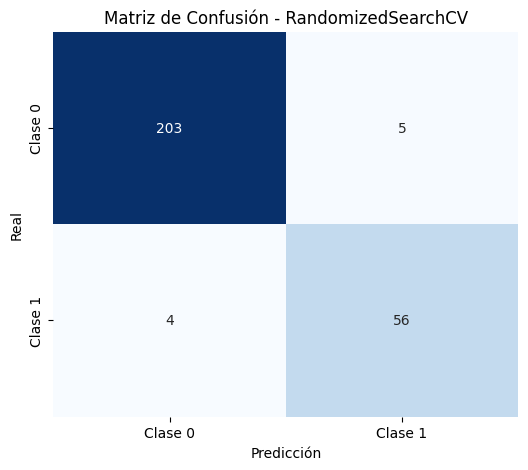

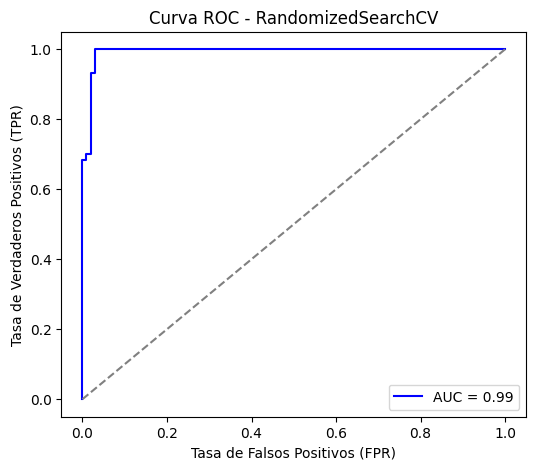

GridSearchCV - Accuracy: 0.9664, Precision: 0.9667, Recall: 0.9664, F1-Score: 0.9665, ROC-AUC: 0.9934


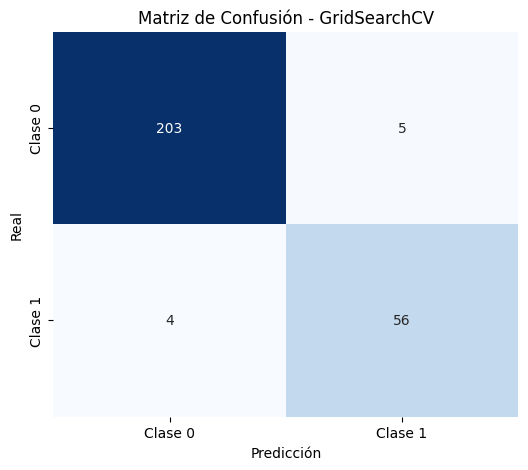

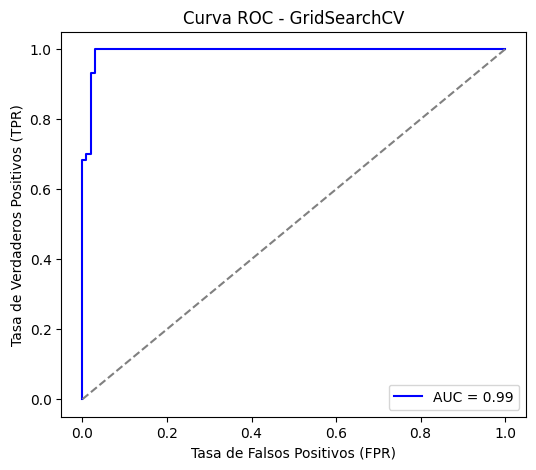

In [38]:
# Función para evaluar el rendimiento de los modelos optimizados
def evaluate_model(model, X_test, y_test, model_name):
    # Predicciones
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]  # Probabilidades para la curva ROC
    
    # Métricas de rendimiento
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    roc_auc = roc_auc_score(y_test, y_prob)
    
    # Matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    
    # Curva ROC
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc_value = auc(fpr, tpr)
    
    # Mostrar resultados
    print(f'{model_name} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}, ROC-AUC: {roc_auc:.4f}')
    
    # Matriz de Confusión
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Clase 0', 'Clase 1'], yticklabels=['Clase 0', 'Clase 1'])
    plt.xlabel('Predicción')
    plt.ylabel('Real')
    plt.title(f'Matriz de Confusión - {model_name}')
    plt.show()
    
    # Curva ROC
    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc_value:.2f}')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlabel('Tasa de Falsos Positivos (FPR)')
    plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
    plt.title(f'Curva ROC - {model_name}')
    plt.legend(loc='lower right')
    plt.show()

# Evaluar los modelos optimizados con GridSearchCV y RandomizedSearchCV
evaluate_model(random_search.best_estimator_, X_test, y_test, 'RandomizedSearchCV')
evaluate_model(grid_search.best_estimator_, X_test, y_test, 'GridSearchCV')


